In [71]:
import vrep 
import sys
import time 
import numpy as np
from tank import *
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [72]:
vrep.simxFinish(-1) # closes all opened connections, in case any prevoius wasnt finished
clientID=vrep.simxStart('127.0.0.1',19999,True,True,5000,5) # start a connection

if clientID!=-1:
    print ("Connected to remote API server")
else:
    print("Not connected to remote API server")
    sys.exit("Could not connect")

#create instance of Tank
tank=Tank(clientID)

Connected to remote API server


In [73]:
proximity_sensors=["s1"]
proximity_sensors_handles=[0]

# get handle to proximity sensors
for i in range(len(proximity_sensors)):
    err_code,proximity_sensors_handles[i] = vrep.simxGetObjectHandle(clientID,"Proximity_sensor_"+proximity_sensors[i], vrep.simx_opmode_blocking)
    
#read and print values from proximity sensors
#first reading should be done with simx_opmode_streaming, further with simx_opmode_buffer parameter
for sensor_name, sensor_handle in zip(proximity_sensors,proximity_sensors_handles):
        err_code,detectionState,detectedPoint,detectedObjectHandle,detectedSurfaceNormalVector=vrep.simxReadProximitySensor(clientID,sensor_handle,vrep.simx_opmode_streaming)

In [74]:
distance = ctrl.Antecedent(np.arange(0, 10, 0.1), 'distance')
velocity = ctrl.Antecedent(np.arange(0, 12, 0.1), 'velocity')
out_velocity = ctrl.Consequent(np.arange(0, 12, 0.1), 'out_velocity')

In [75]:
distance['near'] = fuzz.trimf(distance.universe, [0.5, 0.5, 6])
distance['medium'] = fuzz.trimf(distance.universe, [0.5, 6, 10])
distance['far'] = fuzz.trimf(distance.universe, [6, 10, 10])

velocity['slow'] = fuzz.trimf(velocity.universe, [0, 0, 6])
velocity['medium'] = fuzz.trimf(velocity.universe, [0, 6, 12])
velocity['fast'] = fuzz.trimf(velocity.universe, [6, 12, 12])

out_velocity['slow'] = fuzz.trimf(out_velocity.universe, [0, 0, 0.1])
out_velocity['medium'] = fuzz.trimf(out_velocity.universe, [0, 6, 12])
out_velocity['fast'] = fuzz.trimf(out_velocity.universe, [6, 12, 12])

In [76]:
rules = []
rules.append(ctrl.Rule(distance["far"] & velocity['fast'], out_velocity['fast']))
rules.append(ctrl.Rule(distance["far"] & velocity['medium'], out_velocity['fast']))
rules.append(ctrl.Rule(distance["far"] & velocity['slow'], out_velocity['fast']))
rules.append(ctrl.Rule(distance["near"] & velocity['fast'], out_velocity['slow']))
rules.append(ctrl.Rule(distance["near"] & velocity['medium'], out_velocity['slow']))
rules.append(ctrl.Rule(distance["near"] & velocity['slow'], out_velocity['slow']))
rules.append(ctrl.Rule(distance["medium"] & velocity['medium'], out_velocity['medium']))
rules.append(ctrl.Rule(distance["medium"] & velocity['fast'], out_velocity['fast']))
rules.append(ctrl.Rule(distance["medium"] & velocity['slow'], out_velocity['medium']))

In [77]:
control_system = ctrl.ControlSystemSimulation(ctrl.ControlSystem(rules))

C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


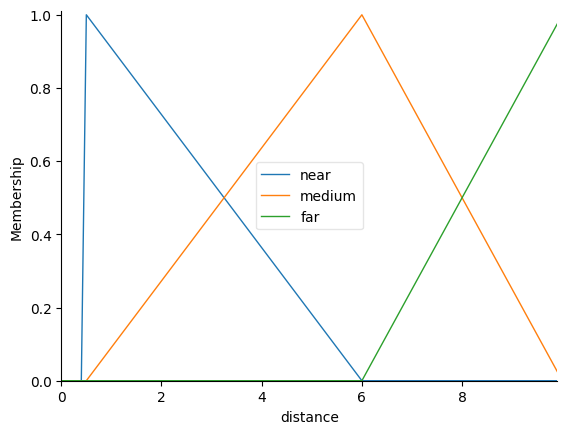

In [78]:
distance.view()

In [79]:
control_system.input["distance"] = 1.8
control_system.input["velocity"] = 1.4987735448825052
control_system.compute()
control_system.output["out_velocity"]

5.888753598759721

In [80]:

velocity = 10
tank.forward(velocity)

t = time.time()
while velocity > 0.1: 
    for sensor_name, sensor_handle in zip(proximity_sensors,proximity_sensors_handles):
        err_code,detectionState,detectedPoint,detectedObjectHandle,detectedSurfaceNormalVector=vrep.simxReadProximitySensor(clientID,sensor_handle,vrep.simx_opmode_buffer )
        if(err_code == 0):
            distance = np.linalg.norm(detectedPoint)
            print(f"v{velocity}")
            print(f"d{distance}")
            control_system.input["distance"] = distance
            control_system.input["velocity"] = velocity
            control_system.compute()
            velocity = control_system.output["out_velocity"]
            tank.forward(velocity)
    print()

v10
d7.184634529014164

v7.266425120772951
d7.184634529014164

v6.218546883308632
d7.184634529014164

v6.218546883308632
d7.184634529014164

v6.218546883308632
d7.184634529014164

v6.218546883308632
d7.184634529014164

v6.218546883308632
d7.184634529014164

v6.218546883308632
d7.184634529014164

v6.218546883308632
d7.184634529014164

v6.218546883308632
d7.184634529014164

v6.218546883308632
d7.184634529014164

v6.218546883308632
d7.184634529014164

v6.218546883308632
d7.184634529014164

v6.218546883308632
d7.184634529014164

v6.218546883308632
d7.184634529014164

v6.218546883308632
d7.184634529014164

v6.218546883308632
d7.184634529014164

v6.218546883308632
d7.184634529014164

v6.218546883308632
d7.184634529014164

v6.218546883308632
d7.184634529014164

v6.218546883308632
d7.184634529014164

v6.218546883308632
d7.184634529014164

v6.218546883308632
d7.184634529014164

v6.218546883308632
d7.184634529014164

v6.218546883308632
d7.184634529014164

v6.218546883308632
d7.184634529014164

v

In [81]:
velocity

0.033868628188360665